In [1]:
import causaldag as cd
import graphical_models as gm
import numpy as np
from visualize import draw

from graphs import mean_match
from policys import random_policy, clique_tree_policy, submodular_policy

/Users/viczhang/miniconda3/envs/cellrepro/lib/python3.6/site-packages/graphical_models/custom_types.py:13: UserWarning: [Need name!] still needs to be tested. If you intend to use this method, please submit a pull request.
  warn(s)
there are no undirected edges


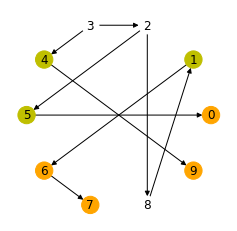

In [2]:
P = mean_match(nnodes=10, sampler='d_tree', sparse=3)
draw(P.DAG, P.intervention, P.solved_intervention, P.remained_changed_nodes)

In [21]:
r_ints = {10:0, 20:0, 50:0, 100:0, 200:0, 500:0, 1000:0}
c_ints = {10:0, 20:0, 50:0, 100:0, 200:0, 500:0, 1000:0}
repeat = 1000

for nnodes in [10, 20, 50, 100]:
    for i in range(repeat):
        P = mean_match(nnodes, sampler='complete', sparse=min(10,nnodes))
        P.reset()
        random_ints = random_policy(P, sparse=1)
        P.reset()  
        clique_ints = clique_tree_policy(P, sparse=1) 
        r_ints[nnodes] += len(random_ints)
        c_ints[nnodes] += len(clique_ints)
    print("###")
    print('random :{}={}'.format(nnodes, r_ints[nnodes]/repeat))
    print('clique :{}={}'.format(nnodes, c_ints[nnodes]/repeat))

/Users/viczhang/miniconda3/envs/cellrepro/lib/python3.6/site-packages/graphical_models/custom_types.py:13: UserWarning: [Need name!] still needs to be tested. If you intend to use this method, please submit a pull request.
  warn(s)
###
random :10=0.0
clique :10=0.0


KeyboardInterrupt: 

In [18]:
print("random graph with density=0.2, sparse=3 - repeated 100 times")
print("random policy: {}".format(r_ints))
print("clique tree policy: {}".format(c_ints))

random graph with density=0.2, sparse=3 - repeated 100 times
random policy: {10: 276, 20: 248, 50: 239, 100: 267}
clique tree policy: {10: 272, 20: 245, 50: 238, 100: 267}


In [ ]:
print("complete graph - repeated 100 times")
print("random policy: {}".format(r_ints))
print("clique tree policy: {}".format(c_ints))

In [14]:
from itertools import combinations
for i in combinations({1,2,3},2):
    if 1 in i:
        print(i)

(1, 2)
(1, 3)


In [33]:
sorted([{1,2},{1}],key=len)

[{1}, {1, 2}]

In [32]:
b

{9}